# Data analysis for the Cities

Import the relevant packages.

In [1]:
using DataFrames, CSV, Plots, LaTeXStrings

Choose plots theme and color scheme.

In [2]:
Plots.theme(:dao)

In [3]:
pal = cgrad(:tol_muted);
cpal10 = [pal[i] for i in 1/20:1/20:1.0]

Need to import the data.

In [4]:
raw_data = DataFrame(CSV.File("./data/msa_rank_freq_each_city.csv"));
# remove missing values
c_data = disallowmissing!(raw_data[completecases(raw_data), :]);
first(c_data,5)

Row,Column1,AREA,OCC_CODE,AREA_NAME,TOT_EMP,OCC_TITLE
,Int64,Int64,String7,String,Float64,String
1,2,10180,11-1021,"Abilene, TX",730.0,General and Operations Managers
2,3,10180,11-2022,"Abilene, TX",60.0,Sales Managers
3,4,10180,11-3011,"Abilene, TX",100.0,Administrative Services Managers
4,5,10180,11-3021,"Abilene, TX",30.0,Computer and Information Systems Managers
5,6,10180,11-3031,"Abilene, TX",90.0,Financial Managers


Need to separate the data for each metropolitan area. Result of `groupby` is all the data for each separate city.

In [5]:
each_met_area = groupby(c_data, :AREA);

Let's have a look at the numbers of workers and numbers of roles in each metropolitan area. Note that there does not seem to be duplicates of `OCC_CODE`.

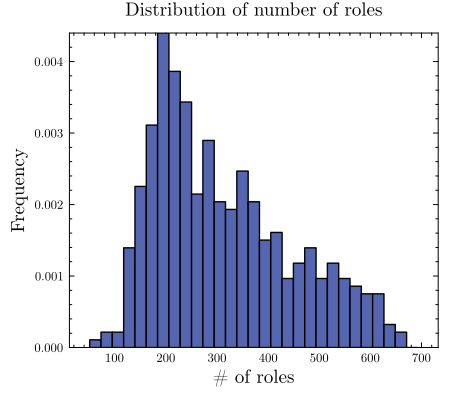

In [6]:
roles = [size(x)[1] for x in each_met_area];
plot(grid = false, minorgrid = false, legend = :none, size = (450,400))
histogram!(roles, bins = range(minimum(roles), maximum(roles), length=30),
        xlabel = "# of roles", ylabel = "Frequency", normalize=:pdf, color = cpal10[1])
plot!(title = "Distribution of number of roles")

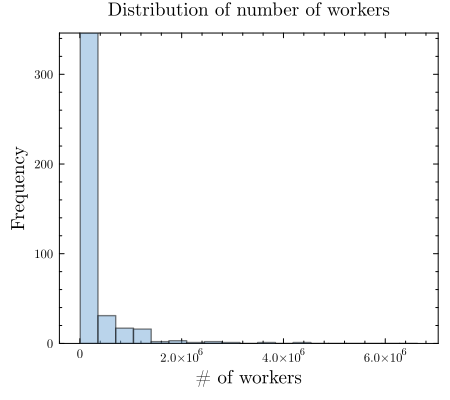

In [7]:
workers = [sum(x[!,:TOT_EMP]) for x in each_met_area];
plot(grid = false, minorgrid = false, legend = :none, size = (450,400))
histogram!(workers, bins = range(minimum(workers), maximum(workers), length=20),
        xlabel = "# of workers", ylabel = "Frequency", color = cpal10[2], alpha = 0.5)
plot!(title = "Distribution of number of workers")

Plot the diversity (total number of elements) versus the total size of the City (logarithm fit done using Mathematica).

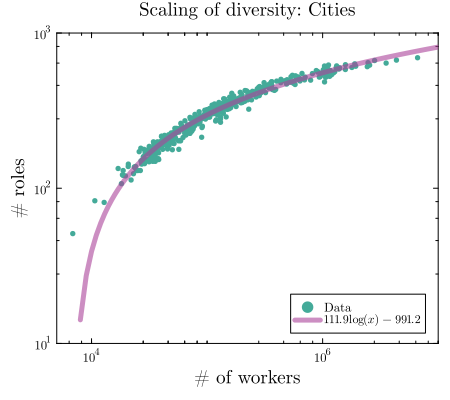

In [8]:
plot(grid = false, minorgrid = false, legend = :none, size = (450,400))
scatter!(workers, roles, xaxis = :log, yaxis = :log, color = pal[3],
        xlabel = "# of workers", ylabel = "# roles", markersize = 3, label = "Data")
plot!(title = "Scaling of diversity: Cities", legend = :bottomright)
plot!(collect(1:1000:10^7),[-991.21+111.869*log(x) for x in collect(1:1000:10^7)], 
    ylims = [10.0,1000], xlims = [5*10^3,10^7], color = cpal10[20], label = L"111.9\log(x)-991.2", 
    width = 5, alpha = 0.6)
# scatter!([workers[370]], [roles[370]], shape = :star, markersize = 15, label = "Walla Walla, WA",
#     color = cpal10[10])
# savefig("scaling-div-cities.pdf")

And now let's plot some of the rank-frequency distributions of the data. Say for the first 20 cities.

In [9]:
norm_rank_freq = []
for i in 1:20
    d = sort(each_met_area[i][!,:TOT_EMP],rev=true)
    norm_d = d./sum(d)
    push!(norm_rank_freq,norm_d)
end

In [10]:
norm_rank_freq;

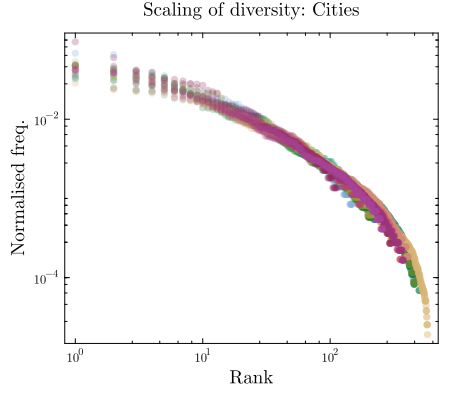

In [11]:
plot(grid = false, minorgrid = false, legend = :none, size = (450,400))
for (i,d) in enumerate(norm_rank_freq)
    scatter!(d, xaxis = :log, yaxis = :log, color = cpal10[i], alpha = 0.25)
end
plot!(title = "Scaling of diversity: Cities", xlabel = "Rank", ylabel = "Normalised freq.")
# savefig("log-log-rf-cities.pdf")